# PyberAnalysis

This analysis focuses on insights around the profit made by Pyber.

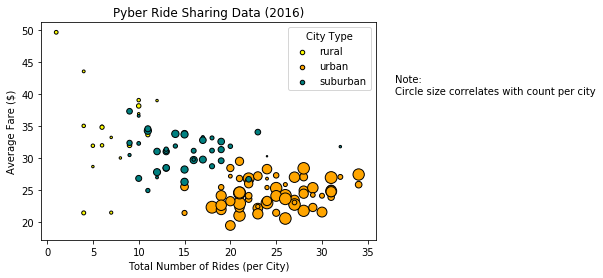

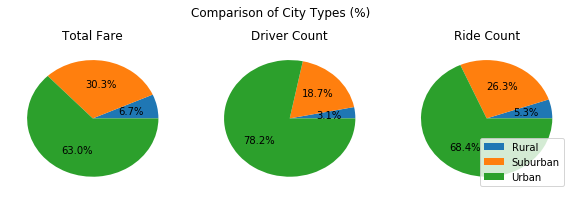

In [31]:
%run Pyber.ipynb

### Priming the Question

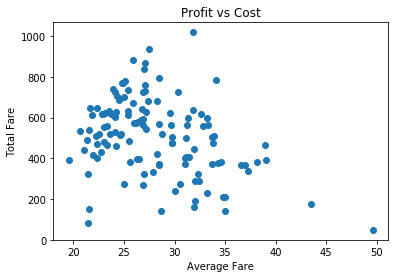

In [226]:
plt.scatter(df['Average Fare'], df['Total Fare'])
plt.title('Profit vs Cost')
plt.xlabel('Average Fare')
plt.ylabel('Total Fare')
plt.show()

Looking at a 'by city' plot of average fare prices and the total revenue, an assumption might be that the increases in mean prices negatively correlate with the total profit! Though conclusions on genuine causation would require more data, can we say that this correlation is meaningful?

### Mean Price and City Type

First, we look at one of the most apparent indicators of Average Price- the City Type

In [100]:
types = [rural, sub, urban]

Text(0,0.5,'Average Fare')

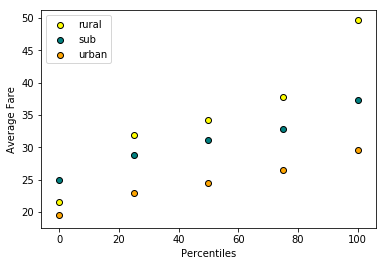

In [139]:
index = [0, 25, 50, 75, 100]
colors = ['yellow', 'teal', 'orange']

i = 0
for t in types:
    plt.scatter(index, t.describe().iloc[3:, 2],
                color = colors[i], edgecolors='black')
    i+=1
plt.legend(labels=['rural', 'sub', 'urban'])
plt.xlabel('Percentiles')
plt.ylabel('Average Fare')

Across cities, grouped by City Type, the mean fares seem to be from similar distributions but with shifted centers. However, it is important to note that this is a model of their means' distributions. It might be more important or insightful to look at the fares themselves.

### Individual Fares and City Type

In [200]:
# Splitting individual fare prices by City Type
r, s, u = [], [], []
ride_list = list(ride['City'])
for x in ride_list:
    if x in list(rural['City']):
        i = ride_list.index(x)
        r.append(ride.iloc[i, 2])
    
    elif x in list(sub['City']):
        i = ride_list.index(x)
        s.append(ride.iloc[i, 2])
    
    elif x in list(urban['City']):
        i = ride_list.index(x)
        u.append(ride.iloc[i, 2])
        
    else:
        print('ERROR')

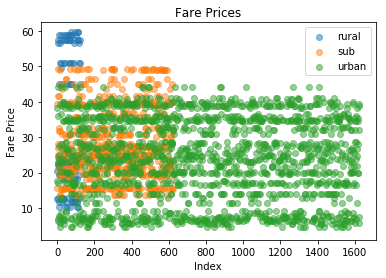

In [225]:
for i in [r, s, u]:
    plt.scatter(range(len(i)), i, alpha=0.5)
    plt.legend(['rural', 'sub', 'urban'])
plt.title('Fare Prices')
plt.ylabel('Fare Price')
plt.xlabel('Index')
plt.show()

The fares seem to be pretty evenly distributed, other than for Rural which looks like it has a gap. Furthermore, the density of these points cloud visual judgment.

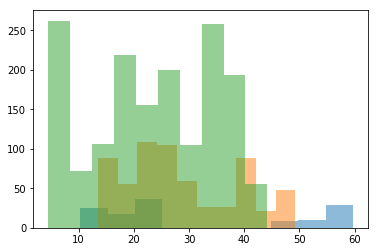

In [219]:
for i in [r, s, u]:
    plt.hist(i, alpha=0.5)

Looking at the distributions of Urban and Suburban, there is a general and distinct increase in fare prices for Suburban Pyber services. While not perfect, they also seem to follow similar distributions other than the previously assumed shift in centers.

One grave mistake in the first analysis, however, was in the assumption of a "clean", similar distribution in the Rural services. Good thing this was checked!

### Price and Profit

We now know that the fares by city type for Urban and Suburban cities are similarly distributed. The distribution of mean prices are, too. 

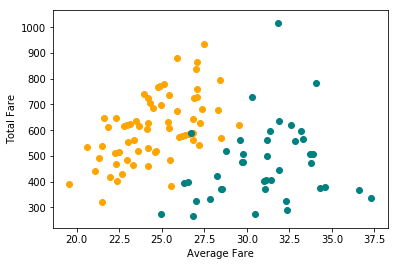

In [228]:
plt.scatter(urban['Average Fare'], urban['Total Fare'], color='orange')
plt.scatter(sub['Average Fare'], sub['Total Fare'], color='teal')
plt.xlabel('Average Fare')
plt.ylabel('Total Fare')
plt.show()

Interesting. The means' correlation to total revenue is actually the opposite of what we had observed earlier when clumping the City Types together. 